In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load the image
img = cv2.imread("sample.jpg")  
img = cv2.resize(img, (256, 256))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [19]:
# Threshold to get binary blobs
# Converts to binary (foreground = white blobs)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [20]:
# Noise removal (Morphological operations)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [21]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

# Unknown region (background - foreground)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [22]:
# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels (so background is not 0)
markers = markers + 1

# Mark unknown region with 0
markers[unknown == 255] = 0

In [23]:
# Apply Watershed transform
markers = cv2.watershed(img, markers)
segmented = img.copy()
segmented[markers == -1] = [0, 0, 255]  # mark boundaries in red

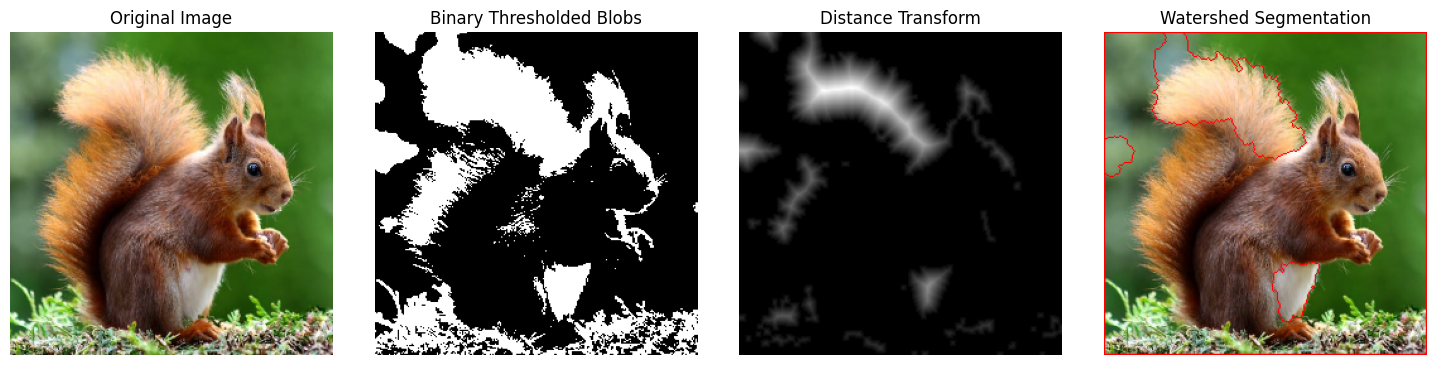

In [24]:
# Display all results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Thresholded Blobs")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(dist_transform, cmap='gray')
plt.title("Distance Transform")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")

plt.tight_layout(pad=3)
plt.show()